In [1]:
# File IO
import os
from pathlib import Path
import shutil

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn

# Custom
import data
import model
import utils

# Shrink Dataset

Take 50% of training data and turn it into 80% train 20% val

In [2]:
rootPath = Path("dataset/train")
destPath = Path("trunc_dataset")
for root, dirs, files in os.walk(rootPath, topdown=False):
    if len(files) != 0:
        relevant_path = Path(*Path(root).parts[2:])
        end_train_idx = int(len(files) * 0.4)
        end_val_idx = int(len(files) * 0.5)
        (destPath / "train" / relevant_path).mkdir(parents=True, exist_ok=True)
        for i in range(0, end_train_idx):
            origin = str(Path(root) / "{}.jpg".format(i))
            dest = str(destPath / "train" / relevant_path / "{}.jpg".format(i))
            shutil.copyfile(origin, dest)
            
        (destPath / "val" / relevant_path).mkdir(parents=True, exist_ok=True)
        for i in range(end_train_idx, end_val_idx):
            origin = str(Path(root) / "{}.jpg".format(i))
            dest = str(destPath / "val" / relevant_path / "{}.jpg".format(i - end_train_idx))
            shutil.copyfile(origin, dest)

In [3]:
fl_train = data.Lung_Dataset("train", verbose=0, root="trunc_dataset")
fl_val = data.Lung_Dataset("val", verbose=0, root="trunc_dataset")
fl_orig = data.Lung_Dataset("train", verbose=0)

fl_labels = {
0 : "Normal",
1 : "Infected"
}

sl_train = data.Lung_Dataset("train", verbose=2, root="trunc_dataset")
sl_val = data.Lung_Dataset("val", verbose=2, root="trunc_dataset")

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

# Grid Search for Learning Rate and Batch Size

LR: 0.01, BS: 16
Epoch 1



Validation loss: 0.5060080953619697
Validation set accuracy:  79.65451055662189 %
Epoch 2



Validation loss: 1.0385264812996893
Validation set accuracy:  74.4721689059501 %
Epoch 3



Validation loss: 0.3101733823617299
Validation set accuracy:  85.98848368522073 %
Epoch 4



Validation loss: 0.13215523376835114
Validation set accuracy:  96.16122840690979 %
Epoch 5



Validation loss: 0.1682869939161747
Validation set accuracy:  96.16122840690979 %
Epoch 6



Validation loss: 0.39428198913281615
Validation set accuracy:  88.09980806142035 %
Epoch 7



Validation loss: 0.7516557998729475
Validation set accuracy:  67.37044145873321 %
Epoch 8



Validation loss: 0.11972654143799887
Validation set accuracy:  95.96928982725528 %
Epoch 9



Validation loss: 0.21815662210186323
Validation set accuracy:  91.74664107485604 %
Epoch 10



Validation loss: 0.17789162533484737
Validation set accuracy:  95.77735124760076 %
Epoch 11



Validation loss: 0.10906082464939434
Validation set accuracy:  95.77735124760076 %
Epoch 12



Validation loss: 0.5944829269904982
Validation set accuracy:  84.45297504798465 %
Epoch 13



Validation loss: 1.566295910062212
Validation set accuracy:  54.12667946257198 %
Epoch 14



Validation loss: 0.19592933497871412
Validation set accuracy:  92.89827255278311 %
Epoch 15



Validation loss: 0.09521114287428756
Validation set accuracy:  96.3531669865643 %
Epoch 16



Validation loss: 0.09885138710678527
Validation set accuracy:  96.16122840690979 %
Epoch 17



Validation loss: 0.13141310389972094
Validation set accuracy:  95.77735124760076 %
Epoch 18



Validation loss: 0.5666697348157564
Validation set accuracy:  84.64491362763916 %
Epoch 19



Validation loss: 0.5226946015926924
Validation set accuracy:  85.98848368522073 %
Epoch 20



Validation loss: 2.019038185928807
Validation set accuracy:  74.6641074856046 %
Validation loss: 0.09238819023558983
Validation set accuracy:  96.3531669865643 %
Epoch 1



Validation loss: 0.5280958306789398
Validation set accuracy:  78.29457364341086 %
Epoch 2



Validation loss: 0.60726900100708
Validation set accuracy:  66.40826873385014 %
Epoch 3



Validation loss: 0.6233355987071991
Validation set accuracy:  69.50904392764858 %
Epoch 4



Validation loss: 0.6124679219722747
Validation set accuracy:  69.76744186046511 %
Epoch 5



Validation loss: 0.6139672660827636
Validation set accuracy:  69.76744186046511 %
Epoch 6



Validation loss: 0.518224972486496
Validation set accuracy:  78.55297157622739 %
Epoch 7



Validation loss: 0.5474398303031921
Validation set accuracy:  74.4186046511628 %
Epoch 8



Validation loss: 0.5520364177227021
Validation set accuracy:  78.55297157622739 %
Epoch 9



Validation loss: 0.617157199382782
Validation set accuracy:  67.70025839793281 %
Epoch 10



Validation loss: 0.6769065427780151
Validation set accuracy:  65.63307493540051 %
Epoch 11



Validation loss: 0.6357727217674255
Validation set accuracy:  65.89147286821705 %
Validation loss: 0.5173935067653656
Validation set accuracy:  78.55297157622739 %
LR: 0.01, BS: 16, LOSS: 0.3048908485004777
LR: 0.01, BS: 32
Epoch 1



Validation loss: 4.98975133895874
Validation set accuracy:  33.78119001919386 %
Epoch 2



Validation loss: 0.9614361559643465
Validation set accuracy:  74.28023032629558 %
Epoch 3



Validation loss: 3.7448047048905315
Validation set accuracy:  74.28023032629558 %
Epoch 4



Validation loss: 4.263762964921839
Validation set accuracy:  41.65067178502879 %
Epoch 5



Validation loss: 0.24593270778217735
Validation set accuracy:  90.40307101727447 %
Epoch 6



Validation loss: 0.2163759675972602
Validation set accuracy:  92.7063339731286 %
Epoch 7



Validation loss: 0.801437951186124
Validation set accuracy:  71.97696737044146 %
Epoch 8



Validation loss: 2.4284500444636627
Validation set accuracy:  74.08829174664108 %
Epoch 9



Validation loss: 0.32440250936676474
Validation set accuracy:  85.02879078694818 %
Epoch 10



Validation loss: 2.990939736366272
Validation set accuracy:  54.31861804222649 %
Epoch 11



Validation loss: 0.19430891539463224
Validation set accuracy:  92.89827255278311 %
Epoch 12



Validation loss: 0.3593013987821691
Validation set accuracy:  86.37236084452975 %
Epoch 13



Validation loss: 0.7330277123871971
Validation set accuracy:  82.53358925143954 %
Epoch 14



Validation loss: 0.27109312726294293
Validation set accuracy:  90.978886756238 %
Epoch 15



Validation loss: 3.9858169275171615
Validation set accuracy:  74.4721689059501 %
Epoch 16



Validation loss: 2.2487010815564323
Validation set accuracy:  44.72168905950096 %
Validation loss: 0.23575414125533664
Validation set accuracy:  92.89827255278311 %
Epoch 1



Validation loss: 0.6789273573802068
Validation set accuracy:  65.37467700258398 %
Epoch 2



Validation loss: 0.622303096147684
Validation set accuracy:  65.63307493540051 %
Epoch 3



Validation loss: 0.5094934701919556
Validation set accuracy:  72.3514211886305 %
Epoch 4



Validation loss: 0.6465772803013141
Validation set accuracy:  67.18346253229974 %
Epoch 5



Validation loss: 0.6061361821798178
Validation set accuracy:  68.47545219638243 %
Epoch 6



Validation loss: 0.6271471129013941
Validation set accuracy:  71.57622739018088 %
Epoch 7



Validation loss: 0.5272311969445302
Validation set accuracy:  70.2842377260982 %
Epoch 8



Validation loss: 0.6127826525614812
Validation set accuracy:  65.37467700258398 %
Validation loss: 0.5422568802650158
Validation set accuracy:  72.3514211886305 %
LR: 0.01, BS: 32, LOSS: 0.38900551076017625
LR: 0.01, BS: 64
Epoch 1



Validation loss: 3.9704960452185736
Validation set accuracy:  26.48752399232246 %
Epoch 2



Validation loss: 0.4567375183105469
Validation set accuracy:  79.84644913627639 %
Epoch 3



Validation loss: 2.8967606756422253
Validation set accuracy:  34.5489443378119 %
Epoch 4



Validation loss: 0.2409905327690972
Validation set accuracy:  90.01919385796545 %
Epoch 5



Validation loss: 0.25411223620176315
Validation set accuracy:  93.85796545105566 %
Epoch 6



Validation loss: 3.5012765725453696
Validation set accuracy:  44.33781190019194 %
Epoch 7



Validation loss: 0.27162926230165696
Validation set accuracy:  91.17082533589252 %
Epoch 8



Validation loss: 2.599378916952345
Validation set accuracy:  74.28023032629558 %
Epoch 9



Validation loss: 1.2149384485350714
Validation set accuracy:  68.71401151631478 %
Validation loss: 0.24151447912057242
Validation set accuracy:  90.01919385796545 %
Epoch 1



Validation loss: 0.5732449633734567
Validation set accuracy:  67.95865633074935 %
Epoch 2



Validation loss: 0.7312773977007184
Validation set accuracy:  46.770025839793284 %
Epoch 3



Validation loss: 0.5823901040213448
Validation set accuracy:  69.76744186046511 %
Epoch 4



Validation loss: 0.5542819521256855
Validation set accuracy:  65.37467700258398 %
Epoch 5



Validation loss: 0.5622319664273944
Validation set accuracy:  71.57622739018088 %
Epoch 6



Validation loss: 0.634870069367545
Validation set accuracy:  65.37467700258398 %
Epoch 7



Validation loss: 0.6026943155697414
Validation set accuracy:  72.60981912144703 %
Epoch 8



Validation loss: 0.525664210319519
Validation set accuracy:  75.96899224806202 %
Epoch 9



Validation loss: 0.6613674248967852
Validation set accuracy:  66.66666666666667 %
Epoch 10



Validation loss: 0.5022112088544028
Validation set accuracy:  75.1937984496124 %
Epoch 11



Validation loss: 0.7427788632256644
Validation set accuracy:  65.37467700258398 %
Epoch 12



Validation loss: 0.6610114276409149
Validation set accuracy:  63.049095607235145 %
Epoch 13



Validation loss: 0.8050358465739659
Validation set accuracy:  46.253229974160206 %
Epoch 14



Validation loss: 0.6923537594931466
Validation set accuracy:  65.89147286821705 %
Epoch 15



Validation loss: 0.5484777305807386
Validation set accuracy:  68.73385012919897 %
Validation loss: 0.5719396131379264
Validation set accuracy:  75.1937984496124 %
LR: 0.01, BS: 64, LOSS: 0.4067270461292494
LR: 0.001, BS: 16
Epoch 1



Validation loss: 0.24729325757785278
Validation set accuracy:  86.56429942418426 %
Epoch 2



Validation loss: 0.13155783537888166
Validation set accuracy:  95.20153550863724 %
Epoch 3



Validation loss: 0.16570919515057045
Validation set accuracy:  95.20153550863724 %
Epoch 4



Validation loss: 0.10084132045846093
Validation set accuracy:  96.16122840690979 %
Epoch 5



Validation loss: 0.12158489409326152
Validation set accuracy:  96.16122840690979 %
Epoch 6



Validation loss: 0.11590161618325069
Validation set accuracy:  96.16122840690979 %
Epoch 7



Validation loss: 0.1164413769023888
Validation set accuracy:  97.31285988483685 %
Epoch 8



Validation loss: 0.08772876830489347
Validation set accuracy:  97.50479846449136 %
Epoch 9



Validation loss: 0.11978156898509372
Validation set accuracy:  96.54510556621881 %
Epoch 10



Validation loss: 0.19057004782106643
Validation set accuracy:  95.58541266794626 %
Epoch 11



Validation loss: 0.14498445681987726
Validation set accuracy:  96.54510556621881 %
Epoch 12



Validation loss: 0.14048547313061796
Validation set accuracy:  96.54510556621881 %
Epoch 13



Validation loss: 0.1533392225577369
Validation set accuracy:  96.3531669865643 %
Validation loss: 0.08368680007741645
Validation set accuracy:  97.50479846449136 %
Epoch 1



Validation loss: 0.591012636423111
Validation set accuracy:  66.14987080103359 %
Epoch 2



Validation loss: 0.5477072554826736
Validation set accuracy:  70.2842377260982 %
Epoch 3



Validation loss: 0.6281445789337158
Validation set accuracy:  64.85788113695091 %
Epoch 4



Validation loss: 0.5872569167613984
Validation set accuracy:  73.90180878552971 %
Epoch 5



Validation loss: 0.5410511028766632
Validation set accuracy:  80.87855297157623 %
Epoch 6



Validation loss: 0.5276431632041931
Validation set accuracy:  78.55297157622739 %
Epoch 7



Validation loss: 0.5642646610736847
Validation set accuracy:  75.1937984496124 %
Epoch 8



Validation loss: 0.6189431619644165
Validation set accuracy:  67.70025839793281 %
Epoch 9



Validation loss: 0.5884310984611512
Validation set accuracy:  68.21705426356588 %
Epoch 10



Validation loss: 0.5500482821464538
Validation set accuracy:  72.86821705426357 %
Epoch 11



Validation loss: 0.6195407629013061
Validation set accuracy:  66.40826873385014 %
Validation loss: 0.5290226244926453
Validation set accuracy:  78.55297157622739 %
LR: 0.001, BS: 16, LOSS: 0.30635471228503086
LR: 0.001, BS: 32
Epoch 1



Validation loss: 0.24832784691277673
Validation set accuracy:  89.0595009596929 %
Epoch 2



Validation loss: 0.20754974598393722
Validation set accuracy:  90.978886756238 %
Epoch 3



Validation loss: 0.23765039356315837
Validation set accuracy:  89.63531669865642 %
Epoch 4



Validation loss: 0.11814339283634634
Validation set accuracy:  96.16122840690979 %
Epoch 5



Validation loss: 0.128227824184304
Validation set accuracy:  95.00959692898273 %
Epoch 6



Validation loss: 0.147661248988965
Validation set accuracy:  94.43378119001919 %
Epoch 7



Validation loss: 0.11635413059197805
Validation set accuracy:  96.54510556621881 %
Epoch 8



Validation loss: 0.10575749248485355
Validation set accuracy:  95.39347408829174 %
Epoch 9



Validation loss: 0.11782758814447067
Validation set accuracy:  95.58541266794626 %
Epoch 10



Validation loss: 0.10555709428701769
Validation set accuracy:  97.12092130518234 %
Epoch 11



Validation loss: 0.09736449120785384
Validation set accuracy:  96.73704414587333 %
Epoch 12



Validation loss: 0.19890117973965757
Validation set accuracy:  94.04990403071017 %
Epoch 13



Validation loss: 0.08901423422674484
Validation set accuracy:  96.54510556621881 %
Epoch 14



Validation loss: 0.10622029806322911
Validation set accuracy:  96.92898272552783 %
Epoch 15



Validation loss: 0.08879440632539198
Validation set accuracy:  96.73704414587333 %
Epoch 16



Validation loss: 0.08635795971049982
Validation set accuracy:  96.92898272552783 %
Epoch 17



Validation loss: 0.10869360362320389
Validation set accuracy:  96.92898272552783 %
Epoch 18



Validation loss: 0.08153548689819325
Validation set accuracy:  97.50479846449136 %
Epoch 19



Validation loss: 0.09670308130957625
Validation set accuracy:  97.12092130518234 %
Epoch 20



Validation loss: 0.12213891761048752
Validation set accuracy:  97.50479846449136 %
Epoch 21



Validation loss: 0.10342805968214046
Validation set accuracy:  96.3531669865643 %
Epoch 22



Validation loss: 0.13981515052899554
Validation set accuracy:  96.3531669865643 %
Epoch 23



Validation loss: 0.0721193852240343
Validation set accuracy:  97.12092130518234 %
Epoch 24



Validation loss: 0.0931573744472938
Validation set accuracy:  97.31285988483685 %
Epoch 25



Validation loss: 0.08970401612767841
Validation set accuracy:  97.69673704414588 %
Epoch 26



Validation loss: 0.11548142978469567
Validation set accuracy:  96.73704414587333 %
Epoch 27



Validation loss: 0.10132807297700577
Validation set accuracy:  96.92898272552783 %
Epoch 28



Validation loss: 0.06024616596679313
Validation set accuracy:  97.31285988483685 %
Epoch 29



Validation loss: 0.14729494609705665
Validation set accuracy:  96.3531669865643 %
Epoch 30



Validation loss: 0.16743145067148896
Validation set accuracy:  95.96928982725528 %
Epoch 31



Validation loss: 0.1421194164774052
Validation set accuracy:  96.73704414587333 %
Epoch 32



Validation loss: 0.13651662801652598
Validation set accuracy:  95.96928982725528 %
Epoch 33



Validation loss: 0.10867257599431254
Validation set accuracy:  96.3531669865643 %
Validation loss: 0.06019949698512552
Validation set accuracy:  97.31285988483685 %
Epoch 1



Validation loss: 0.735366518680866
Validation set accuracy:  65.37467700258398 %
Epoch 2



Validation loss: 0.6508938349210299
Validation set accuracy:  63.565891472868216 %
Epoch 3



Validation loss: 0.5883104869952569
Validation set accuracy:  67.44186046511628 %
Epoch 4



Validation loss: 0.5627505091520456
Validation set accuracy:  70.02583979328165 %
Epoch 5



Validation loss: 0.576400087429927
Validation set accuracy:  69.50904392764858 %
Epoch 6



Validation loss: 0.5893327043606684
Validation set accuracy:  71.57622739018088 %
Epoch 7



Validation loss: 0.6251556093876178
Validation set accuracy:  67.95865633074935 %
Epoch 8



Validation loss: 0.6961308717727661
Validation set accuracy:  65.89147286821705 %
Epoch 9



Validation loss: 0.6641729198969327
Validation set accuracy:  67.70025839793281 %
Validation loss: 0.5589229808403895
Validation set accuracy:  70.02583979328165 %
LR: 0.001, BS: 32, LOSS: 0.3095612389127575
LR: 0.001, BS: 64
Epoch 1



Validation loss: 0.5937840739885966
Validation set accuracy:  74.4721689059501 %
Epoch 2



Validation loss: 0.29886410468154484
Validation set accuracy:  84.45297504798465 %
Epoch 3



Validation loss: 0.17885565095477635
Validation set accuracy:  91.36276391554702 %
Epoch 4



Validation loss: 0.21713682926363415
Validation set accuracy:  93.09021113243762 %
Epoch 5



Validation loss: 0.11917485089765655
Validation set accuracy:  96.16122840690979 %
Epoch 6



Validation loss: 0.13581152343087727
Validation set accuracy:  95.96928982725528 %
Epoch 7



Validation loss: 0.15019188314262363
Validation set accuracy:  96.3531669865643 %
Epoch 8



Validation loss: 0.07704662099584109
Validation set accuracy:  96.92898272552783 %
Epoch 9



Validation loss: 0.14201901025242275
Validation set accuracy:  96.92898272552783 %
Epoch 10



Validation loss: 0.11634061133695973
Validation set accuracy:  97.50479846449136 %
Epoch 11



Validation loss: 0.11698720811141862
Validation set accuracy:  96.73704414587333 %
Epoch 12



Validation loss: 0.11022152023765051
Validation set accuracy:  97.69673704414588 %
Epoch 13



Validation loss: 0.10349416233495706
Validation set accuracy:  96.54510556621881 %
Validation loss: 0.11002541737010081
Validation set accuracy:  96.92898272552783 %
Epoch 1



Validation loss: 0.8741668154086385
Validation set accuracy:  65.37467700258398 %
Epoch 2



Validation loss: 0.7347482187407357
Validation set accuracy:  64.59948320413437 %
Epoch 3



Validation loss: 0.783837514264243
Validation set accuracy:  65.37467700258398 %
Epoch 4



Validation loss: 0.5665189879281181
Validation set accuracy:  66.9250645994832 %
Epoch 5



Validation loss: 0.6066172420978546
Validation set accuracy:  66.40826873385014 %
Epoch 6



Validation loss: 0.6415994167327881
Validation set accuracy:  73.1266149870801 %
Epoch 7



Validation loss: 0.5738352409430912
Validation set accuracy:  66.66666666666667 %
Epoch 8



Validation loss: 0.5743739519800458
Validation set accuracy:  68.21705426356588 %
Epoch 9



Validation loss: 0.6156057779278074
Validation set accuracy:  66.66666666666667 %
Validation loss: 0.5724143896784101
Validation set accuracy:  66.9250645994832 %
LR: 0.001, BS: 64, LOSS: 0.34121990352425546
LR: 0.0001, BS: 16
Epoch 1



Validation loss: 0.2021422688708161
Validation set accuracy:  91.17082533589252 %
Epoch 2



Validation loss: 0.16282030386906682
Validation set accuracy:  94.43378119001919 %
Epoch 3



Validation loss: 0.1450446845229828
Validation set accuracy:  94.81765834932821 %
Epoch 4



Validation loss: 0.11412716803677155
Validation set accuracy:  95.77735124760076 %
Epoch 5



Validation loss: 0.12438803702367074
Validation set accuracy:  96.16122840690979 %
Epoch 6



Validation loss: 0.11001034645420132
Validation set accuracy:  96.3531669865643 %
Epoch 7



Validation loss: 0.09847905300557613
Validation set accuracy:  96.3531669865643 %
Epoch 8



Validation loss: 0.10139637165279551
Validation set accuracy:  96.92898272552783 %
Epoch 9



Validation loss: 0.09064147254508553
Validation set accuracy:  97.12092130518234 %
Epoch 10



Validation loss: 0.08407130151648413
Validation set accuracy:  97.12092130518234 %
Epoch 11



Validation loss: 0.09605709109173129
Validation set accuracy:  97.31285988483685 %
Epoch 12



Validation loss: 0.07640459483037844
Validation set accuracy:  96.73704414587333 %
Epoch 13



Validation loss: 0.09280669189650904
Validation set accuracy:  97.12092130518234 %
Epoch 14



Validation loss: 0.09545368898772832
Validation set accuracy:  96.92898272552783 %
Epoch 15



Validation loss: 0.09701174515948603
Validation set accuracy:  96.92898272552783 %
Epoch 16



Validation loss: 0.08354316957323163
Validation set accuracy:  96.92898272552783 %
Epoch 17



Validation loss: 0.08680044442140074
Validation set accuracy:  97.31285988483685 %
Validation loss: 0.07648394016944098
Validation set accuracy:  96.73704414587333 %
Epoch 1



Validation loss: 0.6789496779441834
Validation set accuracy:  64.85788113695091 %
Epoch 2



Validation loss: 0.7161564326286316
Validation set accuracy:  55.55555555555556 %
Epoch 3



Validation loss: 0.6254725444316864
Validation set accuracy:  65.11627906976744 %
Epoch 4



Validation loss: 0.5988573479652405
Validation set accuracy:  65.63307493540051 %
Epoch 5



Validation loss: 0.5777193343639374
Validation set accuracy:  67.95865633074935 %
Epoch 6



Validation loss: 0.6454463875293732
Validation set accuracy:  65.11627906976744 %
Epoch 7



Validation loss: 0.6855433106422424
Validation set accuracy:  65.11627906976744 %
Epoch 8



Validation loss: 0.7323705017566681
Validation set accuracy:  65.63307493540051 %
Epoch 9



Validation loss: 0.6525695288181305
Validation set accuracy:  65.63307493540051 %
Epoch 10



Validation loss: 0.6185367250442505
Validation set accuracy:  66.9250645994832 %
Validation loss: 0.5568314862251281
Validation set accuracy:  67.95865633074935 %
LR: 0.0001, BS: 16, LOSS: 0.31665771319728453
LR: 0.0001, BS: 32
Epoch 1



Validation loss: 0.41088417260085836
Validation set accuracy:  76.1996161228407 %
Epoch 2



Validation loss: 0.1900652576895321
Validation set accuracy:  92.32245681381957 %
Epoch 3



Validation loss: 0.19866779994438677
Validation set accuracy:  89.82725527831094 %
Epoch 4



Validation loss: 0.1593244163429036
Validation set accuracy:  93.28214971209214 %
Epoch 5



Validation loss: 0.1375888095182531
Validation set accuracy:  94.81765834932821 %
Epoch 6



Validation loss: 0.2627687717185301
Validation set accuracy:  85.22072936660268 %
Epoch 7



Validation loss: 0.2053070234901765
Validation set accuracy:  89.0595009596929 %
Epoch 8



Validation loss: 0.1914222194429706
Validation set accuracy:  92.13051823416507 %
Epoch 9



Validation loss: 0.1815065508160521
Validation set accuracy:  91.36276391554702 %
Epoch 10



Validation loss: 0.17560757433666901
Validation set accuracy:  91.17082533589252 %
Validation loss: 0.1391895838520106
Validation set accuracy:  94.81765834932821 %
Epoch 1



Validation loss: 0.8568455576896667
Validation set accuracy:  65.37467700258398 %
Epoch 2



Validation loss: 0.5703563896509317
Validation set accuracy:  70.02583979328165 %
Epoch 3



Validation loss: 0.5653710869642404
Validation set accuracy:  71.83462532299741 %
Epoch 4



Validation loss: 0.6000378246490772
Validation set accuracy:  66.40826873385014 %
Epoch 5



Validation loss: 0.6139532029628754
Validation set accuracy:  66.14987080103359 %
Epoch 6



Validation loss: 0.622413871379999
Validation set accuracy:  66.66666666666667 %
Epoch 7



Validation loss: 0.5655856143969756
Validation set accuracy:  65.63307493540051 %
Epoch 8



Validation loss: 0.738563189139733
Validation set accuracy:  65.11627906976744 %
Validation loss: 0.5534975941364582
Validation set accuracy:  71.83462532299741 %
LR: 0.0001, BS: 32, LOSS: 0.3463435889942344
LR: 0.0001, BS: 64
Epoch 1



Validation loss: 0.3663209577401479
Validation set accuracy:  82.91746641074856 %
Epoch 2



Validation loss: 0.23136921061409843
Validation set accuracy:  88.48368522072937 %
Epoch 3



Validation loss: 0.19127892537249458
Validation set accuracy:  90.7869481765835 %
Epoch 4



Validation loss: 0.16713646882110172
Validation set accuracy:  94.43378119001919 %
Epoch 5



Validation loss: 0.1743011913365788
Validation set accuracy:  92.89827255278311 %
Epoch 6



Validation loss: 0.18485148499409357
Validation set accuracy:  90.978886756238 %
Epoch 7



Validation loss: 0.17637795706590018
Validation set accuracy:  92.13051823416507 %
Epoch 8



Validation loss: 0.1893170889880922
Validation set accuracy:  92.7063339731286 %
Epoch 9



Validation loss: 0.17148548861344656
Validation set accuracy:  93.85796545105566 %
Validation loss: 0.15279706650310093
Validation set accuracy:  94.43378119001919 %
Epoch 1



Validation loss: 0.7560104301997593
Validation set accuracy:  34.62532299741602 %
Epoch 2



Validation loss: 0.659936785697937
Validation set accuracy:  60.20671834625323 %
Epoch 3



Validation loss: 0.6708039471081325
Validation set accuracy:  57.36434108527132 %
Epoch 4



Validation loss: 0.6418158411979675
Validation set accuracy:  70.54263565891473 %
Epoch 5



Validation loss: 0.5490320239748273
Validation set accuracy:  70.80103359173127 %
Epoch 6



Validation loss: 0.5560234529631478
Validation set accuracy:  70.2842377260982 %
Epoch 7



Validation loss: 0.5894943986620221
Validation set accuracy:  68.21705426356588 %
Epoch 8



Validation loss: 0.6392980558531625
Validation set accuracy:  67.70025839793281 %
Epoch 9



Validation loss: 0.5270500140530723
Validation set accuracy:  68.47545219638243 %
Epoch 10



Validation loss: 0.5971862035138267
Validation set accuracy:  66.66666666666667 %
Epoch 11



Validation loss: 0.5299341550895146
Validation set accuracy:  68.9922480620155 %
Epoch 12



Validation loss: 0.6520673973219735
Validation set accuracy:  66.40826873385014 %
Epoch 13



Validation loss: 0.798187221799578
Validation set accuracy:  66.14987080103359 %
Epoch 14



Validation loss: 0.6604176333972386
Validation set accuracy:  66.14987080103359 %
Validation loss: 0.539155627999987
Validation set accuracy:  68.47545219638243 %
LR: 0.0001, BS: 64, LOSS: 0.3459763472515439
[((0.01, 16), 0.3048908485004777), ((0.01, 32), 0.38900551076017625), ((0.01, 64), 0.4067270461292494), ((0.001, 16), 0.30635471228503086), ((0.001, 32), 0.3095612389127575), ((0.001, 64), 0.34121990352425546), ((0.0001, 16), 0.31665771319728453), ((0.0001, 32), 0.3463435889942344), ((0.0001, 64), 0.3459763472515439)]
Best LR: 0.01, Best BS: 16


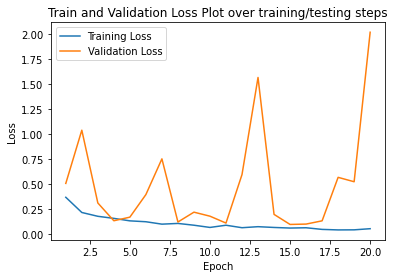

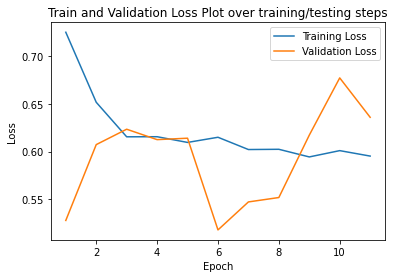

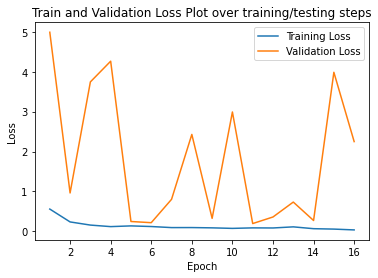

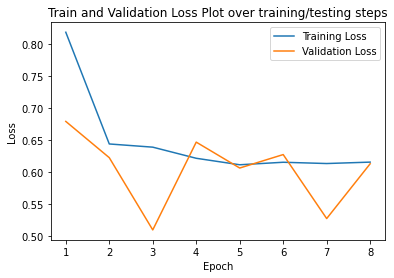

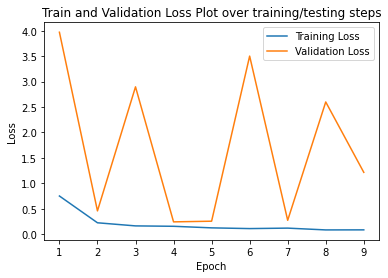

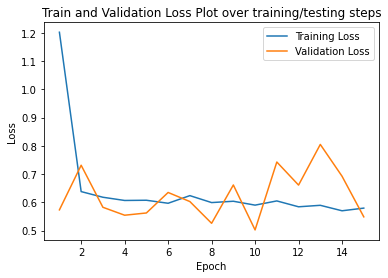

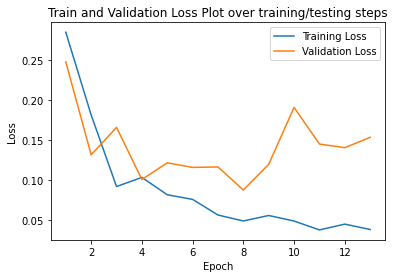

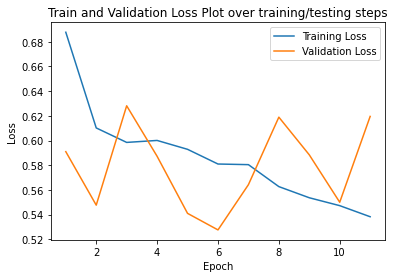

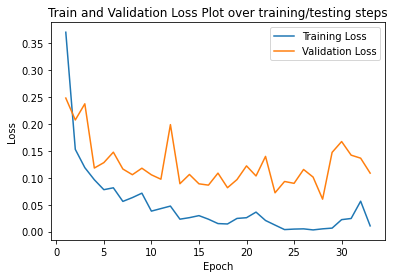

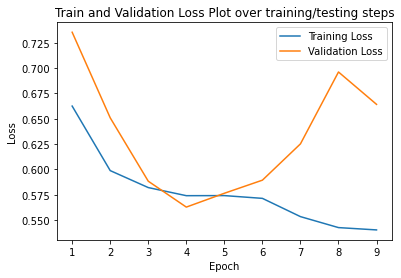

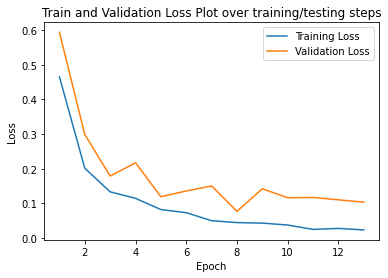

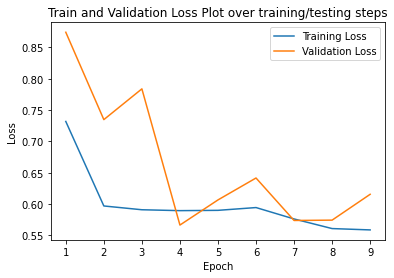

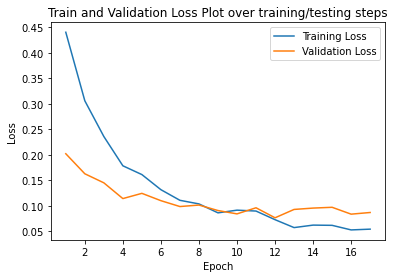

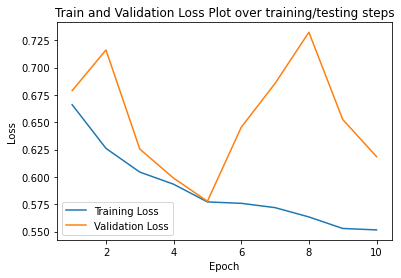

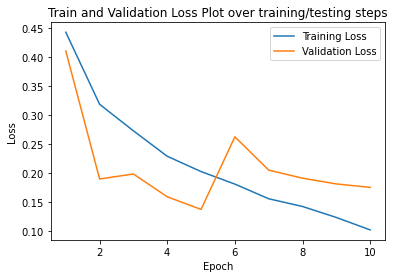

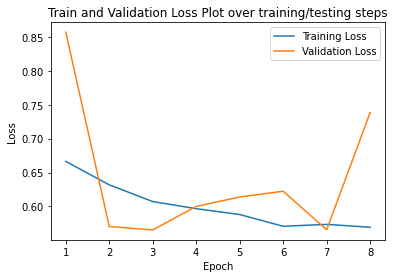

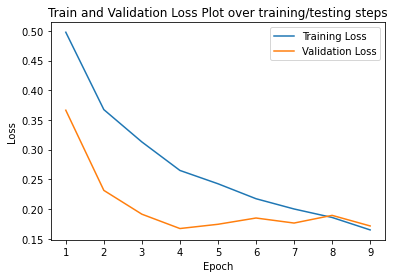

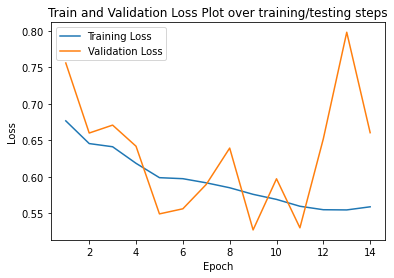

In [8]:
N_EPOCH = 200
L_RATE = [0.01, 0.001, 0.0001]
BATCH_SIZE = [16, 32, 64]
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []

for lr in L_RATE:
    for bs in BATCH_SIZE:
        print("LR: {}, BS: {}".format(lr, bs))
        fl_train_loader = DataLoader(fl_train, batch_size=bs, shuffle=True)
        fl_val_loader = DataLoader(fl_val, batch_size=bs, shuffle=True)

        fl_model = model.CNN().to(device)
        fl_optimizer = optim.Adam(fl_model.parameters(), lr=lr)

        model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")
        fl_loss = model.validate(fl_model, device, nn.BCELoss(), fl_val_loader)

        fl_model.to("cpu")

        sl_train_loader = DataLoader(sl_train, batch_size=bs, shuffle=True)
        sl_val_loader = DataLoader(sl_val, batch_size=bs, shuffle=True)

        sl_model = model.CNN().to(device)
        sl_optimizer = optim.Adam(sl_model.parameters(), lr=lr)
        
        model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
        sl_loss = model.validate(sl_model, device, nn.BCELoss(), sl_val_loader)

        sl_model.to("cpu")
        
        avg_loss = (fl_loss + sl_loss) / 2       
        print("LR: {}, BS: {}, LOSS: {}".format(lr, bs, avg_loss))        
        results.append(((lr, bs), avg_loss))

print(results)
best_lr = None
best_bs = None
best_loss = float("inf")
for result in results:
    if result[1] < best_loss:
        best_lr = result[0][0]
        best_bs = result[0][1]
        best_loss = result[1]
print("Best LR: {}, Best BS: {}".format(best_lr, best_bs))

# Linear Search for Dropout Probability

P: 0.05
Epoch 1



Validation loss: 2.378368442708796
Validation set accuracy:  35.50863723608445 %
Epoch 2



Validation loss: 0.2870963846446212
Validation set accuracy:  90.01919385796545 %
Epoch 3



Validation loss: 3.286310394605001
Validation set accuracy:  37.04414587332054 %
Epoch 4



Validation loss: 0.3297501925491925
Validation set accuracy:  90.21113243761997 %
Epoch 5



Validation loss: 0.9738847270156398
Validation set accuracy:  61.036468330134355 %
Epoch 6



Validation loss: 0.6477821523492987
Validation set accuracy:  73.32053742802303 %
Epoch 7



Validation loss: 0.1500172846894147
Validation set accuracy:  95.58541266794626 %
Epoch 8



Validation loss: 0.2490771139167588
Validation set accuracy:  94.24184261036469 %
Epoch 9



Validation loss: 0.2628310044775858
Validation set accuracy:  90.978886756238 %
Epoch 10



Validation loss: 0.570044126490371
Validation set accuracy:  86.94817658349328 %
Epoch 11



Validation loss: 2.814855906096372
Validation set accuracy:  74.4721689059501 %
Epoch 12



Validation loss: 0.24042332278225909
Validation set accuracy:  93.28214971209214 %
Validation loss: 0.15164690145827603
Validation set accuracy:  95.58541266794626 %
Epoch 1



Validation loss: 0.6266510796546936
Validation set accuracy:  71.31782945736434 %
Epoch 2



Validation loss: 0.6781752729415893
Validation set accuracy:  62.53229974160207 %
Epoch 3



Validation loss: 0.5440778958797455
Validation set accuracy:  75.71059431524547 %
Epoch 4



Validation loss: 0.577965145111084
Validation set accuracy:  74.4186046511628 %
Epoch 5



Validation loss: 0.615782241821289
Validation set accuracy:  69.50904392764858 %
Epoch 6



Validation loss: 0.6021581053733825
Validation set accuracy:  67.44186046511628 %
Epoch 7



Validation loss: 0.5955727422237396
Validation set accuracy:  78.03617571059432 %
Epoch 8



Validation loss: 0.6210070419311523
Validation set accuracy:  67.95865633074935 %
Validation loss: 0.5394451177120209
Validation set accuracy:  75.71059431524547 %
P: 0.05, LOSS: 0.3455460095851485
P: 0.1
Epoch 1



Validation loss: 1.735999623934428
Validation set accuracy:  54.89443378119002 %
Epoch 2



Validation loss: 0.18963516060488694
Validation set accuracy:  91.93857965451056 %
Epoch 3



Validation loss: 0.359127440913157
Validation set accuracy:  84.26103646833013 %
Epoch 4



Validation loss: 0.30410513637418096
Validation set accuracy:  88.67562380038387 %
Epoch 5



Validation loss: 0.22862067773486627
Validation set accuracy:  89.0595009596929 %
Epoch 6



Validation loss: 0.151926787005681
Validation set accuracy:  95.58541266794626 %
Epoch 7



Validation loss: 0.6452140514597748
Validation set accuracy:  77.15930902111324 %
Epoch 8



Validation loss: 0.8927111957560886
Validation set accuracy:  77.35124760076775 %
Epoch 9



Validation loss: 0.11549723078496754
Validation set accuracy:  95.77735124760076 %
Epoch 10



Validation loss: 0.27133824766585324
Validation set accuracy:  88.29174664107485 %
Epoch 11



Validation loss: 1.378410205245018
Validation set accuracy:  75.81573896353167 %
Epoch 12



Validation loss: 0.2692698543806645
Validation set accuracy:  91.17082533589252 %
Epoch 13



Validation loss: 0.33684495971961453
Validation set accuracy:  88.67562380038387 %
Epoch 14



Validation loss: 0.21323349261233074
Validation set accuracy:  91.55470249520154 %
Validation loss: 0.11583249540435094
Validation set accuracy:  95.77735124760076 %
Epoch 1



Validation loss: 0.7754222631454468
Validation set accuracy:  45.21963824289406 %
Epoch 2



Validation loss: 0.5828751409053803
Validation set accuracy:  72.09302325581395 %
Epoch 3



Validation loss: 0.5824709182977676
Validation set accuracy:  70.2842377260982 %
Epoch 4



Validation loss: 0.6671067345142364
Validation set accuracy:  66.40826873385014 %
Epoch 5



Validation loss: 0.5842356777191162
Validation set accuracy:  71.31782945736434 %
Epoch 6



Validation loss: 0.6058321046829224
Validation set accuracy:  66.66666666666667 %
Epoch 7



Validation loss: 0.5617691850662232
Validation set accuracy:  75.45219638242894 %
Epoch 8



Validation loss: 0.5764002406597137
Validation set accuracy:  77.2609819121447 %
Epoch 9



Validation loss: 0.6143291330337525
Validation set accuracy:  71.31782945736434 %
Epoch 10



Validation loss: 0.5719129371643067
Validation set accuracy:  74.93540051679587 %
Epoch 11



Validation loss: 0.6997524523735046
Validation set accuracy:  55.81395348837209 %
Epoch 12



Validation loss: 0.6134920084476471
Validation set accuracy:  65.89147286821705 %
Validation loss: 0.566375048160553
Validation set accuracy:  75.45219638242894 %
P: 0.1, LOSS: 0.34110377178245194
P: 0.15
Epoch 1



Validation loss: 0.6831817615382147
Validation set accuracy:  76.3915547024952 %
Epoch 2



Validation loss: 1.1615702374414965
Validation set accuracy:  75.04798464491363 %
Epoch 3



Validation loss: 1.4029762961647727
Validation set accuracy:  63.339731285988485 %
Epoch 4



Validation loss: 0.5658584729288564
Validation set accuracy:  78.31094049904031 %
Epoch 5



Validation loss: 0.8235667253576332
Validation set accuracy:  76.1996161228407 %
Epoch 6



Validation loss: 0.6062630541396864
Validation set accuracy:  80.61420345489444 %
Epoch 7



Validation loss: 0.38238229579997784
Validation set accuracy:  87.1401151631478 %
Epoch 8



Validation loss: 0.2019417200689063
Validation set accuracy:  92.51439539347409 %
Epoch 9



Validation loss: 0.14342526958154683
Validation set accuracy:  95.77735124760076 %
Epoch 10



Validation loss: 0.18376336839388718
Validation set accuracy:  93.09021113243762 %
Epoch 11



Validation loss: 0.11878676416574419
Validation set accuracy:  96.16122840690979 %
Epoch 12



Validation loss: 0.4095945164109721
Validation set accuracy:  83.30134357005758 %
Epoch 13



Validation loss: 0.13831157107470612
Validation set accuracy:  96.16122840690979 %
Epoch 14



Validation loss: 0.17844502790478256
Validation set accuracy:  93.28214971209214 %
Epoch 15



Validation loss: 0.10853731450730596
Validation set accuracy:  96.16122840690979 %
Epoch 16



Validation loss: 0.322962377438919
Validation set accuracy:  89.0595009596929 %
Epoch 17



Validation loss: 0.2466147055419049
Validation set accuracy:  92.89827255278311 %
Epoch 18



Validation loss: 0.07082441593626175
Validation set accuracy:  97.12092130518234 %
Epoch 19



Validation loss: 0.21263647993548535
Validation set accuracy:  92.51439539347409 %
Epoch 20



Validation loss: 0.23805081723328453
Validation set accuracy:  92.32245681381957 %
Epoch 21



Validation loss: 0.9352850092179847
Validation set accuracy:  69.86564299424184 %
Epoch 22



Validation loss: 0.1681013172598217
Validation set accuracy:  95.00959692898273 %
Epoch 23



Validation loss: 1.9953299237020088
Validation set accuracy:  75.62380038387715 %
Validation loss: 0.06738134522465496
Validation set accuracy:  97.12092130518234 %
Epoch 1



Validation loss: 0.5461382377147674
Validation set accuracy:  73.90180878552971 %
Epoch 2



Validation loss: 0.7450172883272171
Validation set accuracy:  65.37467700258398 %
Epoch 3



Validation loss: 0.5766705095767974
Validation set accuracy:  67.70025839793281 %
Epoch 4



Validation loss: 0.6931304228305817
Validation set accuracy:  65.37467700258398 %
Epoch 5



Validation loss: 0.5360174536705017
Validation set accuracy:  72.09302325581395 %
Epoch 6



Validation loss: 0.5256804418563843
Validation set accuracy:  79.06976744186046 %
Epoch 7



Validation loss: 0.5550923264026641
Validation set accuracy:  78.55297157622739 %
Epoch 8



Validation loss: 0.5767059993743896
Validation set accuracy:  74.4186046511628 %
Epoch 9



Validation loss: 0.5956362450122833
Validation set accuracy:  66.14987080103359 %
Epoch 10



Validation loss: 0.6156714403629303
Validation set accuracy:  66.14987080103359 %
Epoch 11



Validation loss: 0.5599090147018433
Validation set accuracy:  71.83462532299741 %
Validation loss: 0.5259578621387482
Validation set accuracy:  79.06976744186046 %
P: 0.15, LOSS: 0.2966696036817016
[(0.05, 0.3455460095851485), (0.1, 0.34110377178245194), (0.15, 0.2966696036817016)]


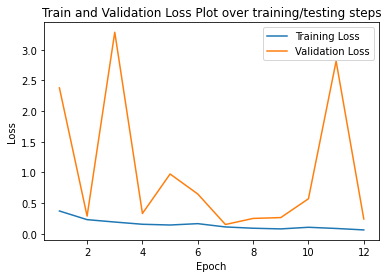

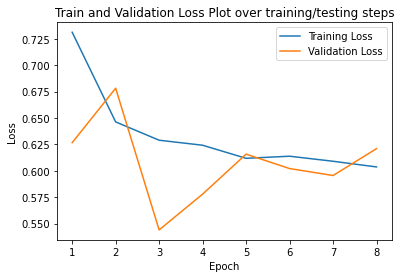

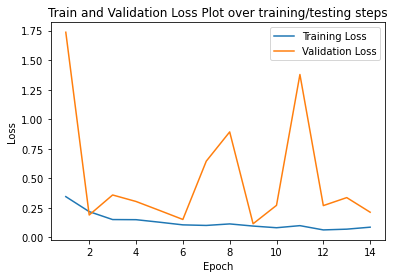

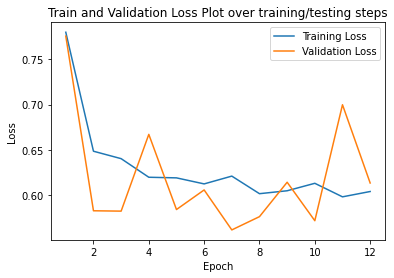

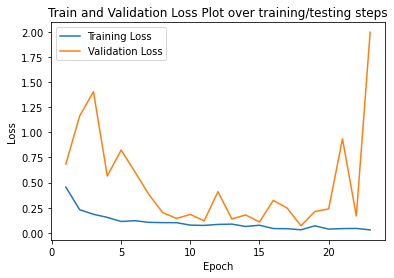

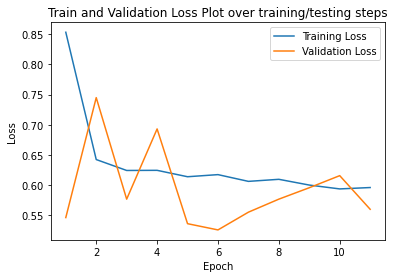

In [9]:
N_EPOCH = 200
L_RATE = best_lr
BATCH_SIZE = best_bs
PATIENCE = 5
DROPOUT = [0.05, 0.1, 0.15]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []

for p in DROPOUT:
    print("P: {}".format(p))
    fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE, shuffle=True)
    fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE, shuffle=True)

    fl_model = model.CNN(dropout=p).to(device)
    fl_optimizer = optim.Adam(fl_model.parameters(), lr=L_RATE)

    model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")
    fl_loss = model.validate(fl_model, device, nn.BCELoss(), fl_val_loader)

    fl_model.to("cpu")

    sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE, shuffle=True)
    sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE, shuffle=True)

    sl_model = model.CNN(dropout=p).to(device)
    sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE)

    model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    sl_loss = model.validate(sl_model, device, nn.BCELoss(), sl_val_loader)

    sl_model.to("cpu")

    avg_loss = (fl_loss + sl_loss) / 2       
    print("P: {}, LOSS: {}".format(p, avg_loss))        
    results.append((p, avg_loss))
    
print(results)